In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt
import numpy as np
import tensorflowjs as tfjs
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
%config InlineBackend.figure_format='svg'

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
options = {
    'model':'cfg/yolo.cfg',
    'load':'bin/yolov2.weights',
    'threshold':0.3
}
tfnet = TFNet(options)

C:\Users\Łukasz\Desktop\IchLerneCNN.py\Objects_Detection\darkflow-master\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.11307096481323242s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bn

In [6]:
img = cv2.imread('xd.jpg',cv2.IMREAD_COLOR)
results = tfnet.return_predict(img)

array([[[ 15,  15,  15],
        [ 15,  15,  15],
        [ 14,  14,  14],
        ...,
        [ 68,  70,  70],
        [ 75,  74,  76],
        [ 81,  80,  82]],

       [[ 15,  15,  15],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [ 68,  70,  70],
        [ 74,  73,  75],
        [ 79,  78,  80]],

       [[ 14,  14,  14],
        [ 14,  14,  14],
        [ 14,  14,  14],
        ...,
        [ 67,  69,  69],
        [ 72,  71,  73],
        [ 77,  76,  78]],

       ...,

       [[103,  98,  99],
        [102,  97,  98],
        [101,  96,  97],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]],

       [[102,  97,  98],
        [102,  97,  98],
        [101,  96,  97],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]],

       [[101,  96,  97],
        [101,  96,  97],
        [101,  96,  97],
        ...,
        [ 36,  36,  36],
        [ 36,  36,  36],
        [ 36,  36,  36]]

{'label': 'person', 'confidence': 0.81233877, 'topleft': {'x': 0, 'y': 73}, 'bottomright': {'x': 443, 'y': 580}}
{'label': 'person', 'confidence': 0.79921913, 'topleft': {'x': 353, 'y': 65}, 'bottomright': {'x': 753, 'y': 594}}


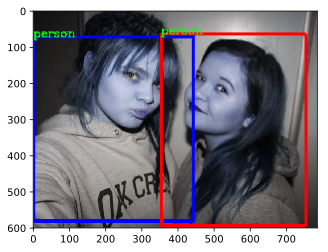

In [7]:
staticImg = img
for result in results:
  
    print(result)
    tl = (result['topleft']['x'],result['topleft']['y'])  
    bl = (result['bottomright']['x'],result['bottomright']['y'])
    label = result['label']
    confidence = result['confidence']
 
    img = cv2.rectangle(img,tl,bl,(0,0,255),7)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
    img = cv2.putText(img,label,tl,cv2.FONT_HERSHEY_COMPLEX,1,(0,255,0),2)

plt.imshow(img)
plt.show()
 